#Regressão Logística - Concessão de Crédito

O objetivo do estudo abaixo é apresentar o uso de regressão logística para análise preditiva para concessão de crédito, utilizando diferentes algoritmos e comparando seus indicadores de desempenho.

**Fonte de dados:** Dataset público extraído originalmente do Kaggle e traduzido para o português.

##Importação de Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

##Funções 

In [ ]:
def tranforma_coluna_categorica_em_numerica(dataset, lista_coluna):

  for coluna in lista_coluna:

    lista = list(enumerate(dataset[coluna].unique()));

    dicionario = {};

    for item in lista:
      dicionario.update({item[1]: item[0]})

    dataset['id_' + coluna] = dataset[coluna].map(dicionario)

  return dataset

In [ ]:
#funcao 'roda_modelo': ajuste a validacao

def roda_modelo(base_dados, classificador):

#separando a base de modelagem e variavel resposta

    y = base_dados['default']
    x = base_dados.drop(columns='default')

#separando a base de treino e teste

    SEED = 77
    treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.30, random_state = SEED)

    base_treino = treino_x.shape[0]
    base_teste = teste_x.shape[0]
    print('A base de treino tem %s elementos e a base de teste tem %s elementos.' %(base_treino, base_teste))
    print(100*'-')

#ajustamdo modelo com base de teste
    
    modelo = classificador
    modelo.fit(treino_x, treino_y)

#-------------------------------------------------------------------------------------------------------------------------------------

#matriz de confusao

    matriz_confusao = plot_confusion_matrix(modelo, teste_x, teste_y, values_format = '.3g', cmap = 'Blues')
    plt.title('Matriz de Confusao')
    plt.show

#classification report

    previsoes = modelo.predict(teste_x)

    print('\nClassification Report:')
    print(classification_report(teste_y, previsoes))

#curva ROC  e AUC

    print(100*'-')
    prob_previsao = modelo.predict_proba(teste_x)[:,1]
   
    tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
    print('roc_auc:', roc_auc_score(teste_y, prob_previsao))
    
    plt.subplots(1, figsize=(5,5))
    plt.title('Curva ROC')
    plt.plot(tfp, tvp)
    plt.plot([0, 1], ls="--", c = 'red') #plotando linha pontilhada guia para regressao aleatoria
    plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha pontilhada guia para regressao perfeita
    plt.ylabel('Sensibilidade')
    plt.xlabel('Especificidade')
    plt.show() 

    return modelo, matriz_confusao

##Carga dos Dados

In [ ]:
dados_origem = pd.read_csv('base_dados_traduzida.csv')
dados_origem.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [ ]:
dados_origem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade                        1000 

In [ ]:
linhas = dados_origem.shape[0]
colunas = dados_origem.shape[1]

print('A base de dados tem %s linhas e %s colunas.' %(linhas, colunas))

A base de dados tem 1000 linhas e 21 colunas.


##Tratamento e Preparação dos Dados

In [ ]:
duplicados = dados_origem.duplicated()
duplicados = duplicados.sum()

print('A base de dados tem %s dados duplicados.' %(duplicados))

A base de dados tem 0 dados duplicados.


In [ ]:
nulos = dados_origem.isnull()
nulos.sum()

default                        0
conta_corrente                 0
prazo_emprestimo_meses         0
historico_credito              0
proposito_emprestimo           0
valor_emprestimo               0
reserva_cc                     0
tempo_emprego_atual            0
taxa_comp_salario              0
sexo_est_civil                 0
outros_fiadores                0
anos_residencia_atual          0
propriedade                    0
idade                          0
outros_planos_financiamento    0
tipo_residencia                0
n_creditos_banco               0
status_emprego                 0
n_dependentes                  0
telefone                       0
trabalhador_estrangeiro        0
dtype: int64

In [ ]:
lista_coluna = ['conta_corrente', 'historico_credito', 'proposito_emprestimo', 'reserva_cc', 'tempo_emprego_atual', 
                'sexo_est_civil', 'outros_fiadores', 'propriedade', 'outros_planos_financiamento', 'tipo_residencia', 
                'status_emprego', 'telefone', 'trabalhador_estrangeiro']

dados = tranforma_coluna_categorica_em_numerica(dados_origem.copy(), lista_coluna)
dados.drop(columns=lista_coluna, inplace=True)
dados.head()

,default,prazo_emprestimo_meses,valor_emprestimo,taxa_comp_salario,anos_residencia_atual,idade,n_creditos_banco,n_dependentes,id_conta_corrente,id_historico_credito,id_proposito_emprestimo,id_reserva_cc,id_tempo_emprego_atual,id_sexo_est_civil,id_outros_fiadores,id_propriedade,id_outros_planos_financiamento,id_tipo_residencia,id_status_emprego,id_telefone,id_trabalhador_estrangeiro
0,0,6,1169,4,4,67,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,48,5951,2,2,22,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0
2,0,12,2096,2,3,49,1,2,2,0,1,1,2,0,0,0,0,0,1,1,0
3,0,42,7882,2,4,45,1,2,0,1,2,1,2,0,1,1,0,1,0,1,0
4,1,24,4870,3,4,53,2,2,0,2,3,1,1,0,0,2,0,1,0,1,0


##Preparação das bases de treino e testes

In [ ]:
y = dados['default']
y.head()

0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int64

In [ ]:
x = dados.drop(columns = ['default'])
x.head()

,prazo_emprestimo_meses,valor_emprestimo,taxa_comp_salario,anos_residencia_atual,idade,n_creditos_banco,n_dependentes,id_conta_corrente,id_historico_credito,id_proposito_emprestimo,id_reserva_cc,id_tempo_emprego_atual,id_sexo_est_civil,id_outros_fiadores,id_propriedade,id_outros_planos_financiamento,id_tipo_residencia,id_status_emprego,id_telefone,id_trabalhador_estrangeiro
0,6,1169,4,4,67,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,48,5951,2,2,22,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0
2,12,2096,2,3,49,1,2,2,0,1,1,2,0,0,0,0,0,1,1,0
3,42,7882,2,4,45,1,2,0,1,2,1,2,0,1,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,0,2,3,1,1,0,0,2,0,1,0,1,0


In [ ]:
SEED = 77
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.30, random_state = SEED)

base_treino = treino_x.shape[0]
base_teste = teste_x.shape[0]

print('A base de treino tem %s elementos e a base de teste tem %s elementos.' %(base_treino, base_teste))

A base de treino tem 700 elementos e a base de teste tem 300 elementos.


##Execução dos Modelos de Machine Learning

In [ ]:
modelo = LogisticRegression(max_iter=1000)
modelo.fit(treino_x, treino_y) 
print(modelo.score(treino_x, treino_y))

0.7271428571428571


In [ ]:
previsoes = modelo.predict(teste_x)
previsoes

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
acuracia = accuracy_score(teste_y, previsoes)
acuracia = round(acuracia, 3)*100
acuracia

78.0

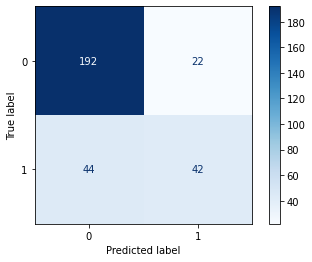

In [ ]:
matriz_confusao = plot_confusion_matrix(modelo, teste_x, teste_y, cmap='Blues', values_format = '.3g')
matriz_confusao   

In [ ]:
print(classification_report(teste_y, previsoes))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       214
           1       0.66      0.49      0.56        86

    accuracy                           0.78       300
   macro avg       0.73      0.69      0.71       300
weighted avg       0.77      0.78      0.77       300



roc_auc 0.7513584003477506


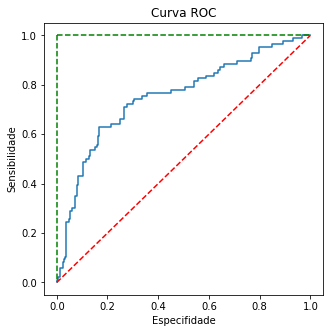

In [ ]:
prob_previsao = modelo.predict_proba(teste_x)[:,1]

#tfp = taxa falsos positivos
#tvp = taxa verdadeiros positivos

tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
print('roc_auc', roc_auc_score(teste_y, prob_previsao))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()


In [ ]:
dados_origem['default'].value_counts()

0    700
1    300
Name: default, dtype: int64

In [ ]:
dados_origem['sexo_est_civil'].value_counts()

male : single                          548
female : divorced/separated/married    310
male : married/widowed                  92
male : divorced/separated               50
Name: sexo_est_civil, dtype: int64

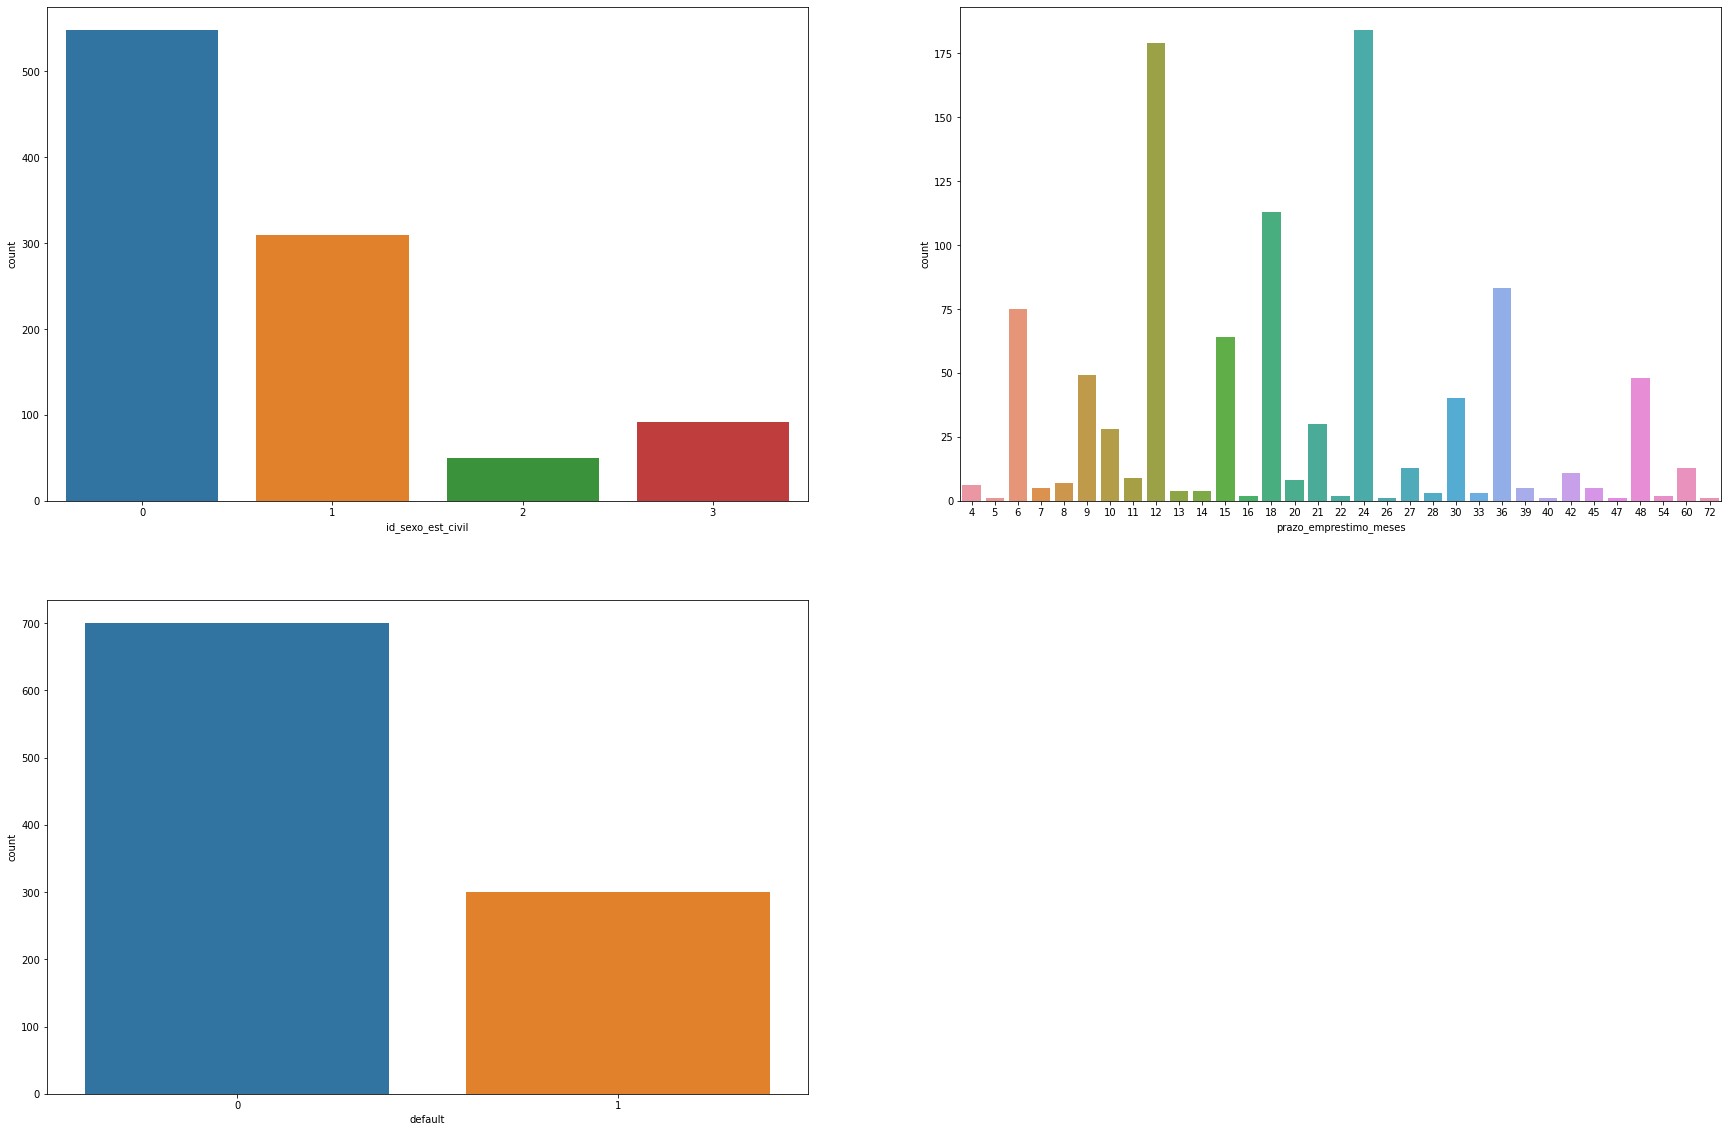

In [ ]:
histogramas = ['id_sexo_est_civil', 'prazo_emprestimo_meses', 'default']

lista_histogramas = list(enumerate(histogramas))

plt.figure(figsize = (30,20))

for i in lista_histogramas:
    plt.subplot(2, 2, i[0]+1)
    sns.countplot(x = i[1], data = dados)

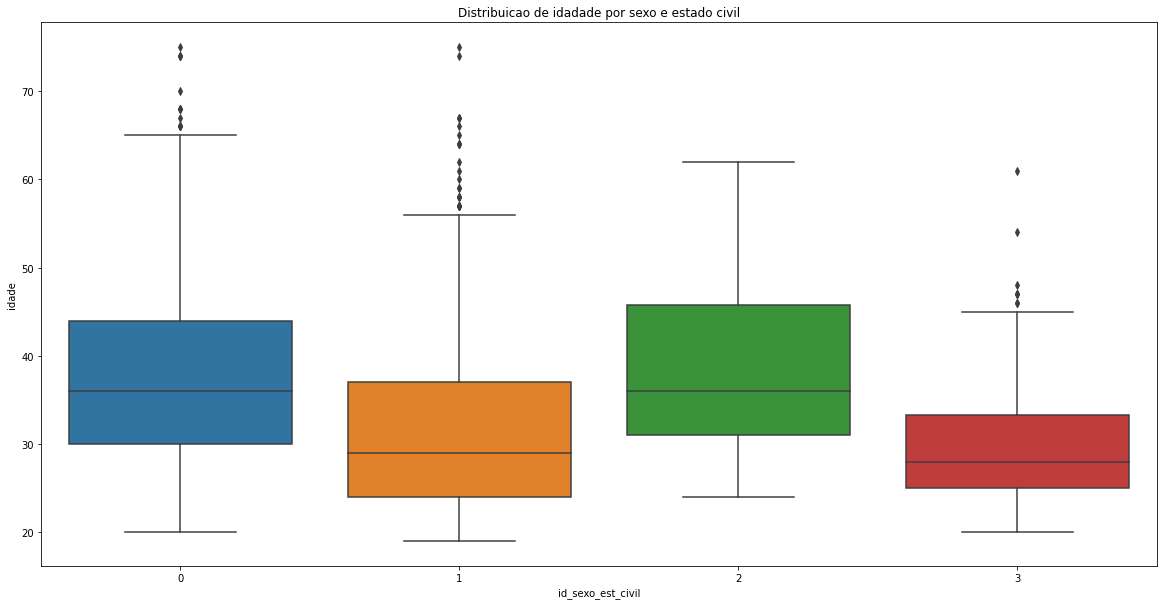

In [ ]:
plt.figure(figsize = (20,10))

sns.boxplot(x = 'id_sexo_est_civil', y = 'idade', data = dados)
plt.title('Distribuicao de idadade por sexo e estado civil')

plt.show()

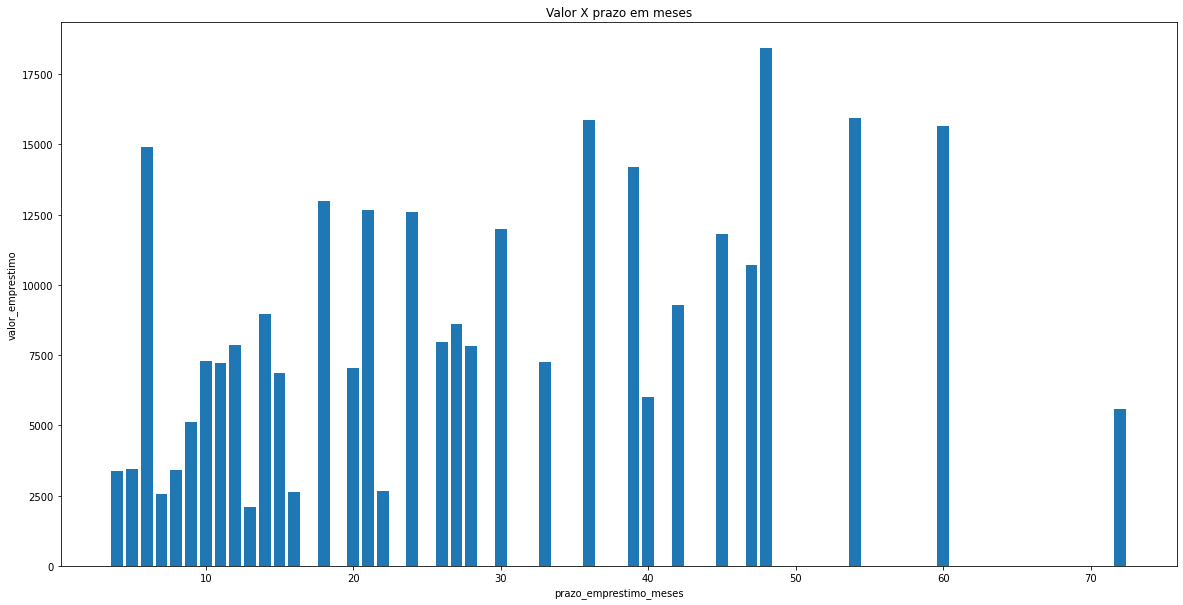

In [ ]:
plt.figure(figsize = (20,10))

plt.bar(dados.prazo_emprestimo_meses, dados.valor_emprestimo)

plt.xlabel('prazo_emprestimo_meses')
plt.ylabel('valor_emprestimo')
plt.title('Valor X prazo em meses')

plt.show()

##Simulação com 5 amostras apenas

In [ ]:
a_x = teste_x.head()
a_y = teste_y.head()
a_y

156    0
112    0
198    0
972    1
328    0
Name: default, dtype: int64

In [ ]:
a_prev = modelo.predict(a_x)
a_prev

array([0, 0, 0, 1, 0])

In [ ]:
 print(classification_report(a_y, a_prev))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [ ]:
a_prob = modelo.predict_proba(a_x)
a_prob

array([[0.79262264, 0.20737736],
       [0.60975263, 0.39024737],
       [0.65102865, 0.34897135],
       [0.35176423, 0.64823577],
       [0.83191836, 0.16808164]])

##Matriz de correlação

In [ ]:
dados.corr()

,default,prazo_emprestimo_meses,valor_emprestimo,taxa_comp_salario,anos_residencia_atual,idade,n_creditos_banco,n_dependentes,id_conta_corrente,id_historico_credito,id_proposito_emprestimo,id_reserva_cc,id_tempo_emprego_atual,id_sexo_est_civil,id_outros_fiadores,id_propriedade,id_outros_planos_financiamento,id_tipo_residencia,id_status_emprego,id_telefone,id_trabalhador_estrangeiro
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,-0.317294,0.232157,0.051311,0.014445,0.099046,0.042643,0.028441,0.090146,0.104885,0.123815,0.027640,0.036466,-0.082079
prazo_emprestimo_meses,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,-0.084226,0.142631,0.105305,-0.009619,-0.031987,-0.116029,0.006711,0.245655,0.076992,0.011950,0.015715,-0.164718,-0.138196
valor_emprestimo,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,-0.063432,0.113776,0.203234,-0.060195,0.005653,-0.159434,0.037921,0.224550,0.045815,0.056119,0.182750,-0.276995,-0.050050
taxa_comp_salario,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.031215,-0.024740,-0.092747,-0.010502,-0.087305,-0.081121,-0.014835,0.039353,0.034750,-0.073955,-0.037933,-0.014413,-0.090024
anos_residencia_atual,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.075162,-0.027989,0.073651,-0.007060,-0.225763,-0.106742,-0.012690,0.055260,-0.034517,0.255106,-0.009815,-0.095359,-0.054097
idade,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,0.057936,-0.070046,0.066020,-0.068435,-0.270485,-0.186563,-0.028294,-0.054186,0.021858,-0.108437,0.163801,-0.145259,-0.006151
n_creditos_banco,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,0.042741,-0.207960,0.071995,-0.003050,-0.103222,-0.089640,-0.017662,0.001209,0.046993,-0.052609,0.017437,-0.065553,-0.009717
n_dependentes,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.027212,0.051849,0.077245,-0.015059,-0.073919,-0.238327,-0.010990,-0.041111,0.057595,-0.015004,0.053475,0.014753,0.077071
id_conta_corrente,-0.317294,-0.084226,-0.063432,-0.031215,-0.075162,0.057936,0.042741,-0.027212,1.000000,-0.131100,-0.079508,0.038927,-0.074184,-0.028672,-0.101713,0.019656,-0.023378,-0.121346,-0.021350,-0.049715,-0.017726
id_historico_credito,0.232157,0.142631,0.113776,-0.024740,-0.027989,-0.070046,-0.207960,0.051849,-0.131100,1.000000,0.143938,0.067464,0.078664,-0.005519,-0.008955,0.071606,0.239431,0.077417,0.037662,0.018283,-0.041784


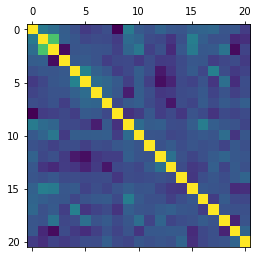

In [ ]:
plt.matshow(dados.corr())
plt.show()

##Comparação entre Diferentes Modelos de Machine Learning

###Regressão Logística

A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       214
           1       0.66      0.49      0.56        86

    accuracy                           0.78       300
   macro avg       0.73      0.69      0.71       300
weighted avg       0.77      0.78      0.77       300

----------------------------------------------------------------------------------------------------
roc_auc: 0.7513584003477506


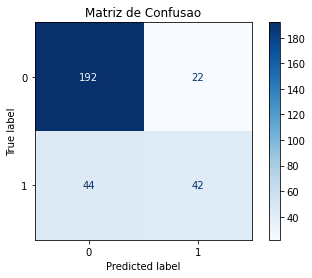

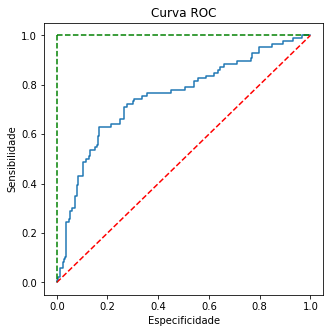

(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f4289266990>)

In [ ]:
roda_modelo(dados, LogisticRegression(max_iter=1000))

###KNN

A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       214
           1       0.46      0.30      0.36        86

    accuracy                           0.70       300
   macro avg       0.60      0.58      0.58       300
weighted avg       0.67      0.70      0.68       300

----------------------------------------------------------------------------------------------------
roc_auc: 0.6097587480982394


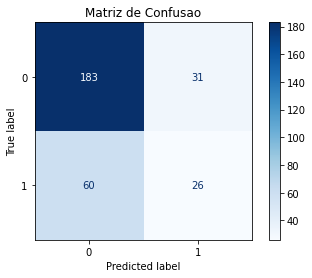

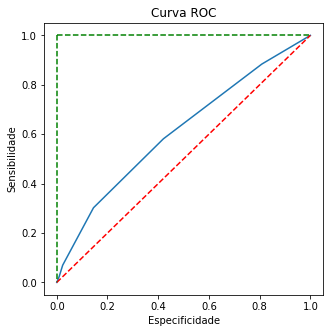

(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f42894ddad0>)

In [ ]:
roda_modelo(dados, KNeighborsClassifier())

###Random Forest

A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.86       214
           1       0.71      0.40      0.51        86

    accuracy                           0.78       300
   macro avg       0.75      0.66      0.68       300
weighted avg       0.77      0.78      0.76       300

----------------------------------------------------------------------------------------------------
roc_auc: 0.778118887198435


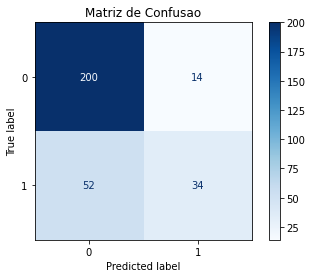

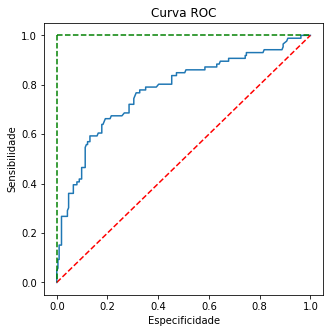

(RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=1000,
                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
                        warm_start=False),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f4294a2a190>)

In [ ]:
 roda_modelo(dados, RandomForestClassifier (n_estimators = 1000, random_state = 42)) 

###Gradient Boosting

A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       214
           1       0.67      0.48      0.56        86

    accuracy                           0.78       300
   macro avg       0.74      0.69      0.71       300
weighted avg       0.77      0.78      0.77       300

----------------------------------------------------------------------------------------------------
roc_auc: 0.7484242555966095


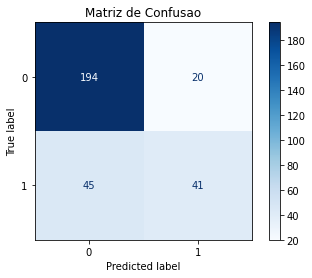

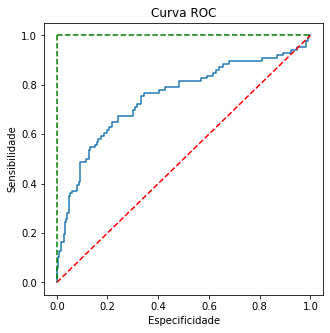

(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.8, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
               nthread=4, objective='binary:logistic', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1.0, seed=27,
               silent=None, subsample=0.8, verbosity=1),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f4294b72f90>)

In [ ]:
roda_modelo(dados, XGBClassifier(learning_rate = 0.1, n_estimators=1000, max_depth=6,
                                 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                 objective= 'binary:logistic', nthread=4, scale_pos_weight=1.0, seed=27))

##Análise dos Modelos de Machine Learning

In [ ]:
Com base na execução dos modelos com o dataset objeto deste estudo, o algoritmo que apresentou melhor desempenho foi o 